<p>We will use <a href="https://www.python.org/">Python 3</a> and <a href="https://jupyter.org">Jupyter Notebook</a> to demonstrate the code in this tutorial.<br>
In addition to Python and Jupyter Notebook, you will need the following Python modules:</p>

<ul>
<li><a href="https://matplotlib.org/">matplotlib</a> - data visualization</li>
<li><a href="http://www.numpy.org/">NumPy</a> - numerical data functionality</li>
<li><a href="https://openpyxl.readthedocs.io/en/default/">OpenPyXL</a> - read/write Excel 2010 xlsx/xlsm files</li>
<li><a href="http://pandas.pydata.org/">pandas</a> - data import, clean-up, exploration, and analysis</li>
<li><a href="https://xlrd.readthedocs.io/en/latest/">xlrd</a> - read Excel data</li>
<li><a href="https://xlwt.readthedocs.io/en/latest/">xlwt</a> - write to Excel</li>
<li><a href="https://xlsxwriter.readthedocs.io/">XlsxWriter</a> - write to Excel (xlsx) files</li>
</ul>

https://www.dataquest.io/blog/excel-and-pandas/

In this tutorial, we will use a multi-sheet Excel file we created from Kaggle's IMDB Scores data. You can download the file here.

https://www.dataquest.io/blog/large_files/movies.xls

Our Excel file has three sheets: '1900s,' '2000s,' and '2010s.' Each sheet has data for movies from those years.

We will use this data set to find the ratings distribution for the movies, visualize movies with highest ratings and net earnings and calculate statistical information about the movies. We will be analyzing and exploring this data using pandas, thus demonstrating pandas capabilities to work with Excel data.

#### Read data from Excel file

In [1]:
import pandas as pd

In [2]:
excel_file = 'movies.xls'
movies = pd.read_excel(excel_file)

In [3]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


Excel files quite often have multiple sheets and the ability to read a specific sheet or all of them is very important. <b>To make this easy, the pandas read_excel method takes an argument called sheetname that tells pandas which sheet to read in the data from. For this, you can either use the sheet name or the sheet number. Sheet numbers start with zero. If the sheetname argument is not given, it defaults to zero and pandas will import the first sheet.</b>

In [4]:
movies.columns

Index(['Title', 'Year', 'Genres', 'Language', 'Country', 'Content Rating',
       'Duration', 'Aspect Ratio', 'Budget', 'Gross Earnings', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Facebook Likes - Director',
       'Facebook Likes - Actor 1', 'Facebook Likes - Actor 2',
       'Facebook Likes - Actor 3', 'Facebook Likes - cast Total',
       'Facebook likes - Movie', 'Facenumber in posters', 'User Votes',
       'Reviews by Users', 'Reviews by Crtiics', 'IMDB Score'],
      dtype='object')

In [5]:
movies.isnull().any()

Title                          False
Year                           False
Genres                         False
Language                        True
Country                        False
Content Rating                  True
Duration                       False
Aspect Ratio                    True
Budget                          True
Gross Earnings                  True
Director                       False
Actor 1                        False
Actor 2                        False
Actor 3                         True
Facebook Likes - Director      False
Facebook Likes - Actor 1       False
Facebook Likes - Actor 2       False
Facebook Likes - Actor 3        True
Facebook Likes - cast Total    False
Facebook likes - Movie         False
Facenumber in posters          False
User Votes                     False
Reviews by Users               False
Reviews by Crtiics              True
IMDB Score                     False
dtype: bool

In [6]:
movies.set_index('Title', inplace = True)

In [7]:
movies.columns

Index(['Year', 'Genres', 'Language', 'Country', 'Content Rating', 'Duration',
       'Aspect Ratio', 'Budget', 'Gross Earnings', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Facebook Likes - Director',
       'Facebook Likes - Actor 1', 'Facebook Likes - Actor 2',
       'Facebook Likes - Actor 3', 'Facebook Likes - cast Total',
       'Facebook likes - Movie', 'Facenumber in posters', 'User Votes',
       'Reviews by Users', 'Reviews by Crtiics', 'IMDB Score'],
      dtype='object')

In [8]:
movies.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,...,2,2,0.0,4,0,1,5,1,1.0,4.8
The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


By default, pandas will automatically assign a numeric index or row label starting with zero. You may want to leave the default index as such if your data doesn't have a column with unique values that can serve as a better index. In case there is a column that you feel would serve as a better index, you can override the default behavior by setting index_col property to a column. It takes a numeric value for setting a single column as index or a list of numeric values for creating a multi-index.

In the below code, we are choosing the first column, 'Title', as index (index=0) by passing zero to the index_col argument.

In [11]:
movies_sheet1 = pd.read_excel(excel_file, sheet_name=0, index_col=0)
movies_sheet1.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,D.W. Griffith,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,Harry F. Millarde,...,2,2,0.0,4,0,1,5,1,1.0,4.8
The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,King Vidor,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,Fritz Lang,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,Georg Wilhelm Pabst,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


In [12]:
movies_sheet2 = pd.read_excel(excel_file, sheet_name=1, index_col=0)
movies_sheet2.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
102 Dalmatians,2000,Adventure|Comedy|Family,English,USA,G,100.0,1.85,85000000.0,66941559.0,Kevin Lima,...,2000.0,795.0,439.0,4182,372,1,26413,77.0,84.0,4.8
28 Days,2000,Comedy|Drama,English,USA,PG-13,103.0,1.37,43000000.0,37035515.0,Betty Thomas,...,12000.0,10000.0,664.0,23864,0,1,34597,194.0,116.0,6.0
3 Strikes,2000,Comedy,English,USA,R,82.0,1.85,6000000.0,9821335.0,DJ Pooh,...,939.0,706.0,585.0,3354,118,1,1415,10.0,22.0,4.0
Aberdeen,2000,Drama,English,UK,NaN,106.0,1.85,6500000.0,64148.0,Hans Petter Moland,...,844.0,2.0,0.0,846,260,0,2601,35.0,28.0,7.3
All the Pretty Horses,2000,Drama|Romance|Western,English,USA,PG-13,220.0,2.35,57000000.0,15527125.0,Billy Bob Thornton,...,13000.0,861.0,820.0,15006,652,2,11388,183.0,85.0,5.8


In [13]:
movies_sheet3 = pd.read_excel(excel_file, sheet_name=2, index_col=0)
movies_sheet3.head()

,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,Director,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
Title,,,,,,,,,,,,,,,,,,,,,
127 Hours,2010.0,Adventure|Biography|Drama|Thriller,English,USA,R,94.0,1.85,18000000.0,18329466.0,Danny Boyle,...,11000.0,642.0,223.0,11984,63000,0.0,279179,440.0,450.0,7.6
3 Backyards,2010.0,Drama,English,USA,R,88.0,NaN,300000.0,NaN,Eric Mendelsohn,...,795.0,659.0,301.0,1884,92,0.0,554,23.0,20.0,5.2
3,2010.0,Comedy|Drama|Romance,German,Germany,Unrated,119.0,2.35,NaN,59774.0,Tom Tykwer,...,24.0,20.0,9.0,69,2000,0.0,4212,18.0,76.0,6.8
8: The Mormon Proposition,2010.0,Documentary,English,USA,R,80.0,1.78,2500000.0,99851.0,Reed Cowan,...,191.0,12.0,5.0,210,0,0.0,1138,30.0,28.0,7.1
A Turtle's Tale: Sammy's Adventures,2010.0,Adventure|Animation|Family,English,France,PG,88.0,2.35,NaN,NaN,Ben Stassen,...,783.0,749.0,602.0,3874,0,2.0,5385,22.0,56.0,6.1


In [14]:
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

In [15]:
movies.shape

(5042, 24)

#### Using the ExcelFile class to read multiple sheets

We can also use the ExcelFile class to work with multiple sheets from the same Excel file. We first wrap the Excel file using ExcelFile and then pass it to read_excel method

In [16]:
xlsx = pd.ExcelFile(excel_file)
movies_sheets = []
for sheet in xlsx.sheet_names:
    movies_sheets.append(xlsx.parse(sheet))
movies = pd.concat(movies_sheets)

In [17]:
movies.shape

(5042, 25)

#### Exploring the data

In [18]:
movies.tail()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1599,War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
1600,Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
1601,Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1
1602,Wuthering Heights,NaN,Drama|Romance,English,UK,NaN,142.0,NaN,NaN,NaN,...,27000.0,698.0,427.0,29196,0,2.0,6053,33.0,9.0,7.7
1603,Yu-Gi-Oh! Duel Monsters,NaN,Action|Adventure|Animation|Family|Fantasy,Japanese,Japan,NaN,24.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,124,0.0,12417,51.0,6.0,7.0


In [19]:
sorted_by_gross = movies.sort_values(['Gross Earnings'], ascending=False)

In [21]:
sorted_by_gross["Gross Earnings"].head(10)

1867    760505847.0
1027    658672302.0
1263    652177271.0
610     623279547.0
611     623279547.0
1774    533316061.0
1281    474544677.0
226     460935665.0
1183    458991599.0
618     448130642.0
Name: Gross Earnings, dtype: float64

In [22]:
sorted_by_gross.loc[:,"Gross Earnings"][:10]

1867    760505847.0
1027    658672302.0
1263    652177271.0
610     623279547.0
611     623279547.0
1774    533316061.0
1281    474544677.0
226     460935665.0
1183    458991599.0
618     448130642.0
Name: Gross Earnings, dtype: float64

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

We will draw a bar plot where each bar will represent one of the top 10 movies. We can do this by calling the plot method and setting the argument kind to barh. This tells matplotlib to draw a horizontal bar plot.

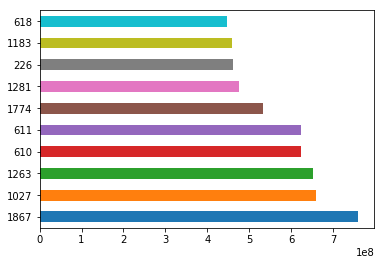

In [24]:
sorted_by_gross['Gross Earnings'].head(10).plot(kind="barh")
plt.show()

Let's create a histogram of IMDB Scores to check the distribution of IMDB Scores across all movies. Histograms are a good way to visualize the distribution of a data set. We use the plot method on the IMDB Scores series from our movies DataFrame and pass it the argument kind="hist".

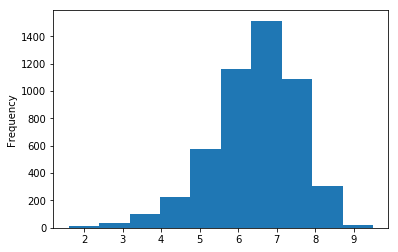

In [25]:
movies['IMDB Score'].plot(kind="hist")
plt.show()

This data visualization suggests that most of the IMDB Scores fall between six and eight.

#### Getting statistical information about the data

In [26]:
movies.describe()

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
count,4935.000000,5028.000000,4714.000000,4.551000e+03,4.159000e+03,4938.000000,5035.000000,5029.000000,5020.000000,5042.000000,5042.000000,5029.000000,5.042000e+03,5022.000000,4993.000000,5042.000000
mean,2002.470517,107.201074,2.220403,3.975262e+07,4.846841e+07,686.621709,6561.323932,1652.080533,645.009761,9700.959143,7527.457160,1.371446,8.368475e+04,272.770808,140.194272,6.442007
std,12.474599,25.197441,1.385113,2.061149e+08,6.845299e+07,2813.602405,15021.977635,4042.774685,1665.041728,18165.101925,19322.070537,2.013683,1.384940e+05,377.982886,121.601675,1.125189
min,1916.000000,7.000000,1.180000,2.180000e+02,1.620000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000,1.000000,1.600000
25%,1999.000000,93.000000,1.850000,6.000000e+06,5.340988e+06,7.000000,614.500000,281.000000,133.000000,1411.250000,0.000000,0.000000,8.599250e+03,65.000000,50.000000,5.800000
50%,2005.000000,103.000000,2.350000,2.000000e+07,2.551750e+07,49.000000,988.000000,595.000000,371.500000,3091.000000,166.000000,1.000000,3.437100e+04,156.000000,110.000000,6.600000
75%,2011.000000,118.000000,2.350000,4.500000e+07,6.230944e+07,194.750000,11000.000000,918.000000,636.000000,13758.750000,3000.000000,2.000000,9.634700e+04,326.000000,195.000000,7.200000
max,2016.000000,511.000000,16.000000,1.221550e+10,7.605058e+08,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000,349000.000000,43.000000,1.689764e+06,5060.000000,813.000000,9.500000


In [26]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5042 entries, 0 to 1603
Data columns (total 25 columns):
Title                          5042 non-null object
Year                           4935 non-null float64
Genres                         5042 non-null object
Language                       5031 non-null object
Country                        5038 non-null object
Content Rating                 4740 non-null object
Duration                       5028 non-null float64
Aspect Ratio                   4714 non-null float64
Budget                         4551 non-null float64
Gross Earnings                 4159 non-null float64
Director                       4938 non-null object
Actor 1                        5035 non-null object
Actor 2                        5029 non-null object
Actor 3                        5020 non-null object
Facebook Likes - Director      4938 non-null float64
Facebook Likes - Actor 1       5035 non-null float64
Facebook Likes - Actor 2       5029 non-null float64
F

In [27]:
movies["Gross Earnings"].mean()

48468407.52680933

In [28]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0


#### Reading files with no header and skipping records

Earlier in this tutorial, we saw some ways to read a particular kind of Excel file that had headers and no rows that needed skipping. Sometimes, the Excel sheet doesn't have any header row. For such instances, you can tell pandas not to consider the first row as header or columns names. And If the Excel sheet's first few rows contain data that should not be read in, you can ask the read_excel method to skip a certain number of rows, starting from the top.

For example, look at the top few rows of this Excel file

In [29]:
'''
movies_skip_rows = pd.read_excel("movies-no-header-skip-rows.xls", header=None, skiprows=4)
movies_skip_rows.head(5)
'''

'\nmovies_skip_rows = pd.read_excel("movies-no-header-skip-rows.xls", header=None, skiprows=4)\nmovies_skip_rows.head(5)\n'

In [30]:
'''

movies_skip_rows.columns = ['Title', 'Year', 'Genres', 'Language', 'Country', 'Content Rating',
       'Duration', 'Aspect Ratio', 'Budget', 'Gross Earnings', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Facebook Likes - Director',
       'Facebook Likes - Actor 1', 'Facebook Likes - Actor 2',
       'Facebook Likes - Actor 3', 'Facebook Likes - cast Total',
       'Facebook likes - Movie', 'Facenumber in posters', 'User Votes',
       'Reviews by Users', 'Reviews by Crtiics', 'IMDB Score']
movies_skip_rows.head()

'''

"\n\nmovies_skip_rows.columns = ['Title', 'Year', 'Genres', 'Language', 'Country', 'Content Rating',\n       'Duration', 'Aspect Ratio', 'Budget', 'Gross Earnings', 'Director',\n       'Actor 1', 'Actor 2', 'Actor 3', 'Facebook Likes - Director',\n       'Facebook Likes - Actor 1', 'Facebook Likes - Actor 2',\n       'Facebook Likes - Actor 3', 'Facebook Likes - cast Total',\n       'Facebook likes - Movie', 'Facenumber in posters', 'User Votes',\n       'Reviews by Users', 'Reviews by Crtiics', 'IMDB Score']\nmovies_skip_rows.head()\n\n"

#### Reading a subset of columns

In [31]:
movies_subset_columns = pd.read_excel(excel_file, parse_cols=6)
movies_subset_columns.head()

/home/abhash/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """Entry point for launching an IPython kernel.


,Title,Year,Genres,Language,Country,Content Rating,Duration
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110


Alternatively, you can pass in a list of numbers, which will let you import columns at particular indexes.

#### Applying formulas on the columns

In [33]:
movies["Net Earnings"] = movies["Gross Earnings"] - movies["Budget"]

In [34]:
import numpy as np
np.nanmax(movies["Net Earnings"])

523505847.0

Above, we used pandas to create a new column called Net Earnings, and populated it with the difference of Gross Earnings and Budget. It's worth noting the difference here in how formulas are treated in Excel versus pandas. In Excel, a formula lives in the cell and updates when the data changes - with Python, the calculations happen and the values are stored - if Gross Earnings for one movie was manually changed, Net Earnings won't be updated.



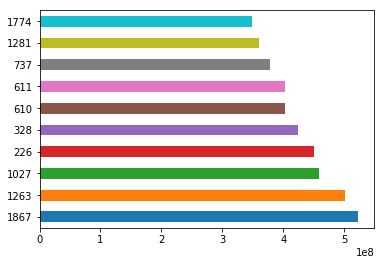

In [35]:
sorted_movies = movies[['Net Earnings']].sort_values(['Net Earnings'], ascending=[False])
sorted_movies.head(10)['Net Earnings'].plot.barh()
plt.show()


In [36]:
movies[['Net Earnings']]

,Net Earnings
0,NaN
1,2900000.0
2,NaN
3,-5973565.0
4,NaN
5,2429000.0
6,NaN
7,NaN
8,1861000.0
9,NaN


In [37]:
movies['Net Earnings']

0               NaN
1         2900000.0
2               NaN
3        -5973565.0
4               NaN
5         2429000.0
6               NaN
7               NaN
8         1861000.0
9               NaN
10              NaN
11        2391000.0
12       -1336755.0
13              NaN
14      182925485.0
15              NaN
16              NaN
17              NaN
18      194678278.0
19              NaN
20       19402612.0
21              NaN
22       74120000.0
23       81700000.0
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
           ...     
1574            NaN
1575            NaN
1576            NaN
1577            NaN
1578            NaN
1579            NaN
1580            NaN
1581            NaN
1582            NaN
1583            NaN
1584            NaN
1585            NaN
1586            NaN
1587            NaN
1588            NaN
1589            NaN
1590            NaN
1591            NaN
1592            NaN


In [39]:
movies_subset = movies[['Year', 'Gross Earnings']]
movies_subset.head()

,Year,Gross Earnings
0,1916.0,NaN
1,1920.0,3000000.0
2,1925.0,NaN
3,1927.0,26435.0
4,1929.0,9950.0


In [40]:
movies.loc[:,['Year', 'Gross Earnings']].head()

,Year,Gross Earnings
0,1916.0,NaN
1,1920.0,3000000.0
2,1925.0,NaN
3,1927.0,26435.0
4,1929.0,9950.0


#### Pivot table in pandas

Advanced Excel users also often use pivot tables. A pivot table summarizes the data of another table by grouping the data on an index and applying operations such as sorting, summing, or averaging. You can use this feature in pandas too.

We need to first identify the column or columns that will serve as the index, and the column(s) on which the summarizing formula will be applied. Let's start small, by choosing Year as the index column and Gross Earnings as the summarization column and creating a separate DataFrame from this data

In [41]:
movies_subset = movies[['Year', 'Gross Earnings']]
movies_subset.head()

,Year,Gross Earnings
0,1916.0,NaN
1,1920.0,3000000.0
2,1925.0,NaN
3,1927.0,26435.0
4,1929.0,9950.0


In [42]:
earnings_by_year = movies_subset.pivot_table(index=['Year'])
earnings_by_year.head()

,Gross Earnings
Year,
1920.0,3000000.0
1927.0,26435.0
1929.0,1408975.0
1933.0,2300000.0
1935.0,3000000.0


This gave us a pivot table with grouping on Year and summarization on the sum of Gross Earnings. Notice, we didn't need to specify Gross Earnings column explicitly as pandas automatically identified it the values on which summarization should be applied.

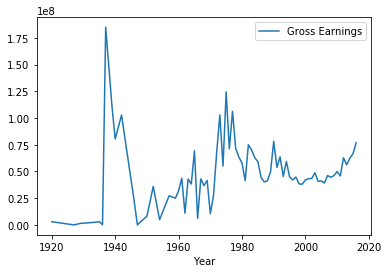

In [43]:
earnings_by_year.plot()
plt.show()

In [44]:
movies_subset = movies[['Country', 'Language', 'Gross Earnings']]
movies_subset.head()

,Country,Language,Gross Earnings
0,USA,NaN,NaN
1,USA,NaN,3000000.0
2,USA,NaN,NaN
3,Germany,German,26435.0
4,Germany,German,9950.0


In [45]:
earnings_by_co_lang = movies_subset.pivot_table(index=['Country', 'Language'])
earnings_by_co_lang.head()

Gross Earnings
Country     Language                  
Afghanistan Dari          1.127331e+06
Argentina   Spanish       7.230936e+06
Aruba       English       1.007614e+07
Australia   Aboriginal    6.165429e+06
            Dzongkha      5.052950e+05

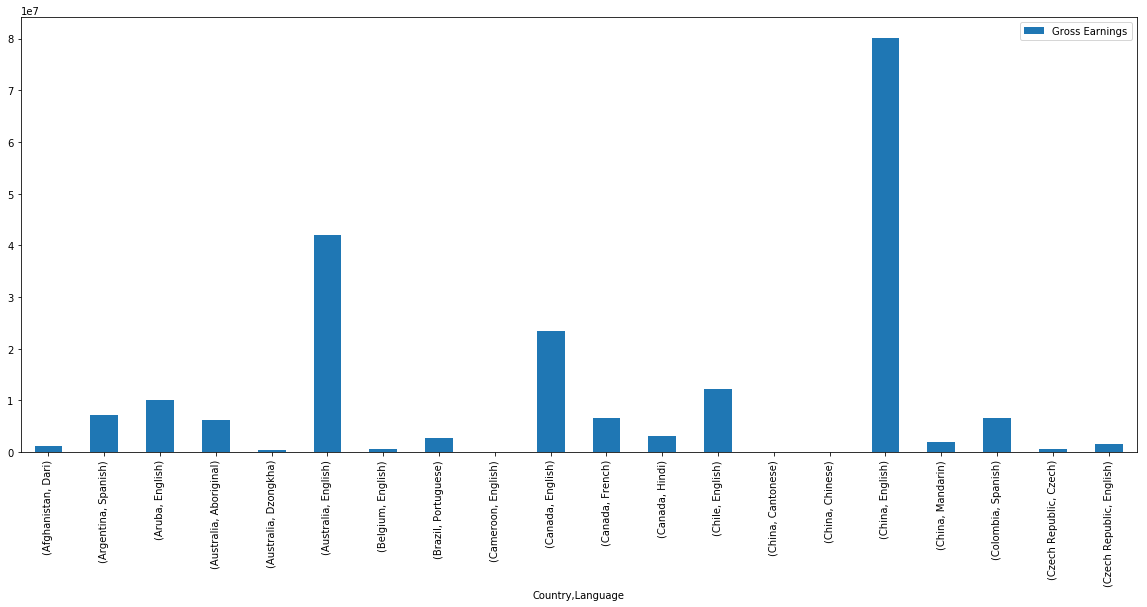

In [46]:
earnings_by_co_lang.head(20).plot(kind='bar', figsize=(20,8))
plt.show()

#### Exporting the results to Excel

If you're going to be working with colleagues who use Excel, saving Excel files out of pandas is important. You can export or write a pandas DataFrame to an Excel file using pandas to_excel method. Pandas uses the xlwt Python module internally for writing to Excel files. The to_excel method is called on the DataFrame we want to export.We also need to pass a filename to which this DataFrame will be written.

In [47]:
movies.to_excel('output.xlsx')

By default, the index is also saved to the output file. However, sometimes the index doesn't provide any useful information. For example, the movies DataFrame has a numeric auto-increment index, that was not part of the original Excel data.

In [48]:
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score,Net Earnings
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0,NaN
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8,2900000.0
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3,NaN
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3,-5973565.0
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0,NaN


You can choose to skip the index by passing along index-False.

In [49]:
movies.to_excel('output.xlsx', index=False)


We need to be able to make our output files look nice before we can send it out to our co-workers. We can use pandas ExcelWriter class along with the XlsxWriter Python module to apply the formatting.

We can use these advanced output options by creating a ExcelWriter object and use this object to write to the EXcel file.

In [50]:
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')

movies.to_excel(writer, index=False, sheet_name='report')

workbook = writer.book

worksheet = writer.sheets['report']

In [51]:
header_fmt = workbook.add_format({'bold': True})
worksheet.set_row(0, None, header_fmt)

In [ ]:
writer.save()